In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Step 1: Load the dataset
training_data = pd.read_csv('data/training.csv')
validation_data = pd.read_csv('data/validation.csv')
test_data = pd.read_csv('data/test.csv')

In [3]:
# Step 2: Split the data into features and target
X_train = training_data.iloc[:, 1:-1]  # Features
y_train = training_data.iloc[:, -1]  # Target
X_val = validation_data.iloc[:, 1:-1]  # Features
y_val = validation_data.iloc[:, -1]  # Target
X_test = test_data.iloc[:, 1:-1]  # Features
y_test = test_data.iloc[:, -1]  # Target

In [4]:
# Step 3: Train a decision tree model without hyperparameter tuning
dtc_default = DecisionTreeClassifier(random_state=42)
dtc_default.fit(X_train, y_train)

# Evaluate the accuracy on validation_data
y_val_pred_default = dtc_default.predict(X_val)
val_accuracy_default = accuracy_score(y_val, y_val_pred_default)
print(f"Validation accuracy without hyperparameter tuning: {val_accuracy_default}")

Validation accuracy without hyperparameter tuning: 0.7222087672559941


Accuracy: 0.7222
Precision-score : 0.7113
Recall-Score : 0.7222
F1-Score: 0.7161
              precision    recall  f1-score   support

         0.0       0.80      0.83      0.82      3089
         1.0       0.44      0.39      0.41      1040

    accuracy                           0.72      4129
   macro avg       0.62      0.61      0.62      4129
weighted avg       0.71      0.72      0.72      4129

Confusion matrix

 [[2578  511]
 [ 636  404]]

True Positives(TP) =  2578

True Negatives(TN) =  404

False Positives(FP) =  511

False Negatives(FN) =  636


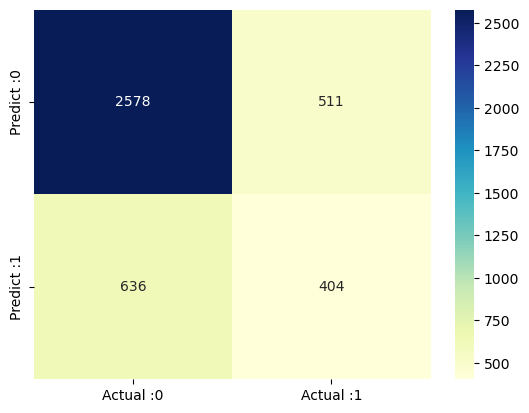

In [5]:
# Step 4: Print accuracy, precision-score, recall-score and F1-score of the default model
print('Accuracy: {0:0.4f}'.format(accuracy_score(y_val_pred_default, y_val)))
print("Precision-score :",
        round(precision_score(y_val_pred_default, y_val, average='weighted'), 4))
print("Recall-Score :",
        round(recall_score(y_val_pred_default, y_val, average='weighted'), 4))
print("F1-Score:", round(f1_score(y_val_pred_default, y_val, average='weighted'), 4))

print(classification_report(y_val_pred_default, y_val))

# Print confusion matrix of the model
cm_default = confusion_matrix(y_val_pred_default, y_val)
print('Confusion matrix\n\n', cm_default)
print('\nTrue Positives(TP) = ', cm_default[0, 0])
print('\nTrue Negatives(TN) = ', cm_default[1, 1])
print('\nFalse Positives(FP) = ', cm_default[0, 1])
print('\nFalse Negatives(FN) = ', cm_default[1, 0])

cm_matrix_default = pd.DataFrame(data=cm_default, columns=['Actual :0', 'Actual :1'],
                            index=['Predict :0', 'Predict :1'])

sns.heatmap(cm_matrix_default, annot=True, fmt='d', cmap='YlGnBu')  
plt.show()  

In [6]:
# Step 5: Perform hyperparameter tuning using GridSearchCV
param_grid = {"criterion": ["gini", "entropy"],
              "max_depth": np.arange(1, 11),
              "min_samples_split": [2, 10, 20],
              "min_samples_leaf": [1, 5, 10]}

dtc = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dtc, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [7]:
# Step 6: Train the decision tree model
best_dtc = grid_search.best_estimator_
best_dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [8]:
# Step 7: Evaluate the model performance
y_val_pred = best_dtc.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation accuracy: {val_accuracy}")

y_test_pred = best_dtc.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test accuracy: {test_accuracy}")

Validation accuracy: 0.8137563574715427
Test accuracy: 0.823002421307506


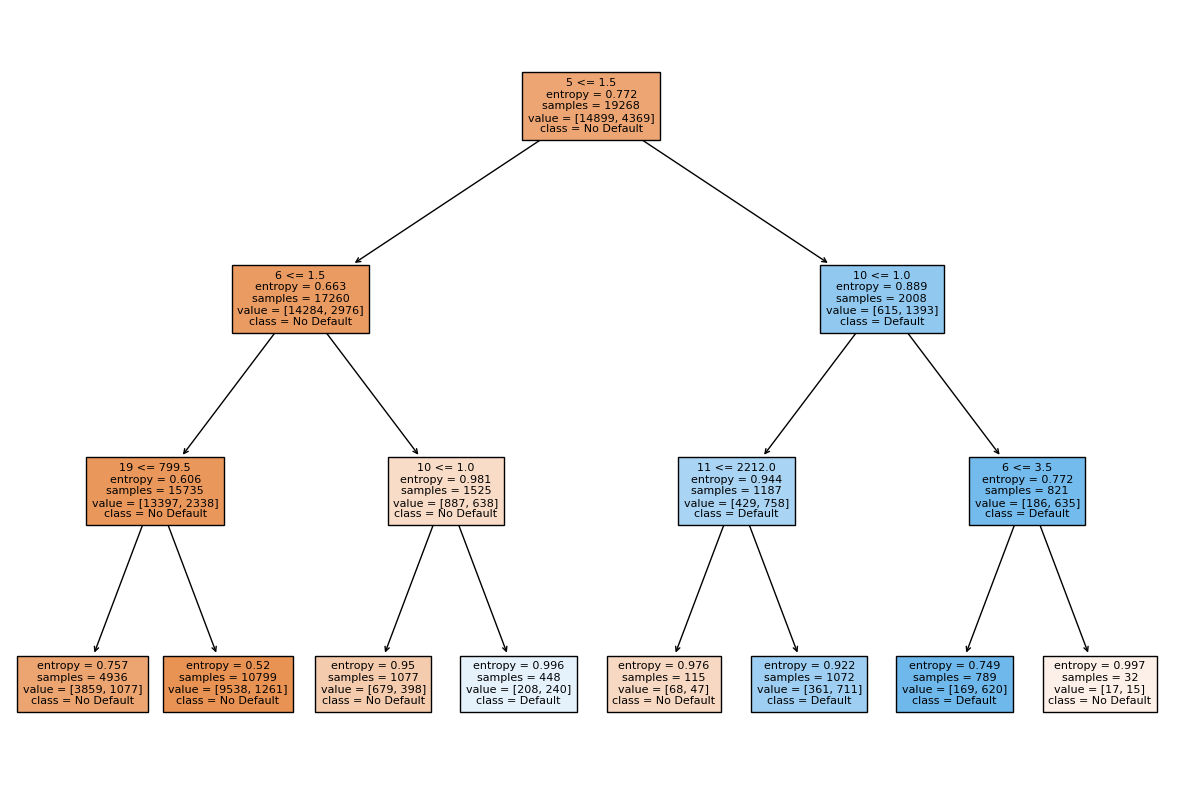

In [9]:
# Step 8: Plot the decision tree
fig, ax = plt.subplots(figsize=(15, 10))
tree.plot_tree(best_dtc, max_depth=3, feature_names=X_test.columns,
               class_names=["No Default", "Default"], filled=True, fontsize=8, ax=ax)
plt.show()

Accuracy: 0.8230
Precision-score : 0.8834
Recall-Score : 0.823
F1-Score: 0.8439
              precision    recall  f1-score   support

         0.0       0.95      0.84      0.89      3620
         1.0       0.38      0.71      0.50       510

    accuracy                           0.82      4130
   macro avg       0.67      0.78      0.70      4130
weighted avg       0.88      0.82      0.84      4130

Confusion matrix

 [[3036  584]
 [ 147  363]]

True Positives(TP) =  3036

True Negatives(TN) =  363

False Positives(FP) =  584

False Negatives(FN) =  147


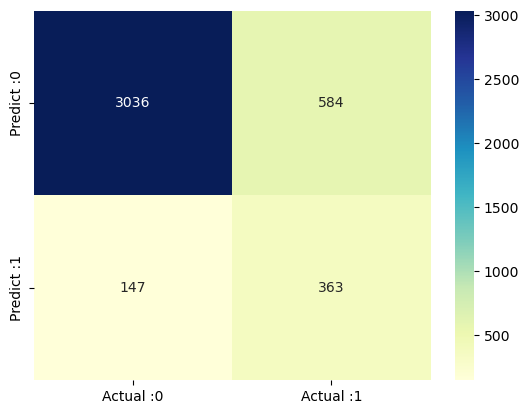

In [10]:
# Step 9: Print accuracy, precision-score, recall-score and F1-score of the model
print('Accuracy: {0:0.4f}'.format(accuracy_score( y_test_pred, y_test)))
print("Precision-score :",
        round(precision_score(y_test_pred, y_test, average='weighted'), 4))
print("Recall-Score :",
        round(recall_score(y_test_pred, y_test, average='weighted'), 4))
print("F1-Score:", round(f1_score(y_test_pred, y_test, average='weighted'), 4))

print(classification_report(y_test_pred, y_test))

# Print confusion matrix of the model
cm = confusion_matrix(y_test_pred, y_test)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0, 0])
print('\nTrue Negatives(TN) = ', cm[1, 1])
print('\nFalse Positives(FP) = ', cm[0, 1])
print('\nFalse Negatives(FN) = ', cm[1, 0])

cm_matrix = pd.DataFrame(data=cm, columns=['Actual :0', 'Actual :1'],
                            index=['Predict :0', 'Predict :1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')  
plt.show()  